# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [4]:
# Difference in stock price
df['Diff'] = df['Adj Close'].diff().shift(-1)

# Target
df['Target'] = np.sign(df['Diff'])

# Premium
df['Premium'] = 0.08 * df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:'2023-09-30', :].copy()

In [8]:
# Fit a log regression
logreg = LogisticRegression()

logreg.fit(X, y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [9]:
y_pred = logreg.predict(X)

In [10]:
df['Predictions'] = y_pred

In [11]:
df['Profits'] = 0.

In [12]:
# True Positive Profits
df.loc[(df['Target'] == 1) & (df['Predictions'] == 1), 'Profits'] = df['Premium']

#False Positive
df.loc[(df['Target'] == -1) & (df['Predictions'] == 1), 'Profits'] = -100 * df['Premium']

df.head()

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842


# 5.) Plot profits over time

Text(0, 0.5, 'Profit')

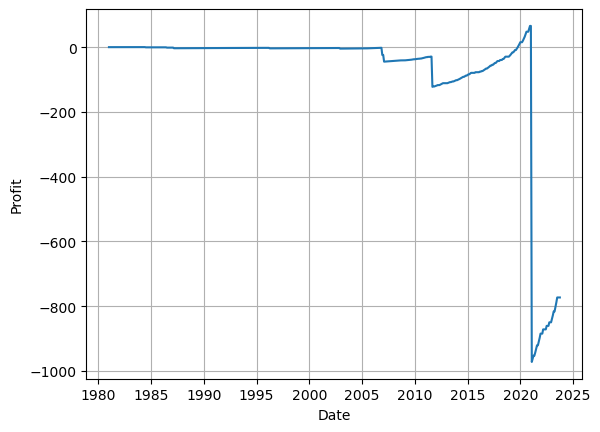

In [13]:
plt.plot(np.cumsum(df['Profits']))
plt.grid()
plt.xlabel('Date')
plt.ylabel('Profit')

## 5.5) Short write up about how you see your skills valuable to PJ and/or Philip Liu

My knowledge in blockchain can be useful when building up the platform for the Arena. 

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.